In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=34, drop_out_precent=.2) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

          ResNet-125                 [-1, 1000]               0
          Linear-126                   [-1, 12]          12,012
ResNet_GrayScale_12_Out-127                   [-1, 12]               0
Total params: 21,803,412
Trainable params: 21,803,412
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.39
Forward/backward pass size (MB): 196.50
Params size (MB): 83.17
Estimated Total Size (MB): 280.07
----------------------------------------------------------------


In [5]:
standardTraining = StandardTraining(number_images=2500, 
                                     batch_size=16, 
                                     learning_rate=1e-4, 
                                     num_epochs=6,
                                     device=device, 
                                     net=net,
                                     use_positivity_weights=True,
                                     observation_min_count = 40)

C:\git\Springboard-Public\Capstone Project 2\modules\lib\ChextXRayImages.py:251: UserWarning: 
Feature Imbalance Detected (train % - val %):
   Lung_Opacity: 2.46%
   Lung_Lesion: 2.38%

  self.warnFeatureImbalance(train, value)


Total Oversampled Rows Added to Train: 581

Number of Training Images: 2,590
Number of Validation Images: 491

\Positive Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum     13.632768
Cardiomegaly                    4.418410
Lung_Opacity                    1.102273
Lung_Lesion                    16.986111
Edema                           2.775510
Consolidation                  24.145631
Pneumonia                      46.090909
Atelectasis                     5.286408
Pneumothorax                   14.602410
Pleural_Effusion                1.746554
Pleural_Other                 102.600000
Fracture                       29.470588
dtype: float64

In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 50.6071         
Time of Completion: 2020-07-25 09:48:43.508284          
Training Time: 0:00:44.252719          
Validation Time: 0:00:03.623316

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,478,0.282427,0.859873,0.425197,0.734622,0.544716
4,Edema,686,0.288630,0.638710,0.397590,0.705167,0.532107
5,Consolidation,103,0.000000,0.000000,0.000000,0.543666,0.042626
7,Atelectasis,412,0.063107,0.866667,0.117647,0.603701,0.282011
9,Pleural_Effusion,943,0.396607,0.610114,0.480720,0.721250,0.608928



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,58,0.431034,0.185185,0.259067,0.614797,0.162830
4,Edema,118,0.771186,0.323843,0.456140,0.658313,0.337464
5,Consolidation,23,0.000000,0.000000,0.000000,0.392140,0.048407
7,Atelectasis,74,0.000000,0.000000,0.000000,0.556031,0.230087
9,Pleural_Effusion,180,0.961111,0.388764,0.553600,0.695909,0.546309


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 44.6954         
Time of Completion: 2020-07-25 09:49:30.281280          
Training Time: 0:00:43.198549          
Validation Time: 0:00:03.521588

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,478,0.464435,0.844106,0.599190,0.830514,0.692386
4,Edema,686,0.441691,0.691781,0.539146,0.799661,0.657611
5,Consolidation,103,0.000000,0.000000,0.000000,0.621390,0.050779
7,Atelectasis,412,0.165049,0.871795,0.277551,0.700410,0.425360
9,Pleural_Effusion,943,0.525981,0.684138,0.594724,0.787393,0.706300



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,58,0.000000,0.000000,0.000000,0.584614,0.144074
4,Edema,118,0.237288,0.459016,0.312849,0.730063,0.421249
5,Consolidation,23,0.000000,0.000000,0.000000,0.606745,0.072737
7,Atelectasis,74,0.000000,0.000000,0.000000,0.586590,0.193979
9,Pleural_Effusion,180,0.205556,0.672727,0.314894,0.724294,0.588329


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 41.9914         
Time of Completion: 2020-07-25 09:50:17.417306          
Training Time: 0:00:43.531659          
Validation Time: 0:00:03.550511

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,478,0.474895,0.813620,0.599736,0.868848,0.723272
4,Edema,686,0.508746,0.705051,0.591025,0.853579,0.721260
5,Consolidation,103,0.000000,0.000000,0.000000,0.679428,0.068170
7,Atelectasis,412,0.199029,0.732143,0.312977,0.750969,0.459730
9,Pleural_Effusion,943,0.568399,0.708058,0.630588,0.828490,0.755430



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,58,0.103448,0.181818,0.131868,0.605678,0.165621
4,Edema,118,0.135593,0.500000,0.213333,0.729631,0.455435
5,Consolidation,23,0.000000,0.000000,0.000000,0.615478,0.088319
7,Atelectasis,74,0.000000,0.000000,0.000000,0.518472,0.196172
9,Pleural_Effusion,180,0.344444,0.645833,0.449275,0.713737,0.591457


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 40.3335         
Time of Completion: 2020-07-25 09:51:04.907385          
Training Time: 0:00:43.885712          
Validation Time: 0:00:03.552506

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,478,0.533473,0.825243,0.648030,0.877205,0.749888
4,Edema,686,0.526239,0.723447,0.609283,0.865214,0.742195
5,Consolidation,103,0.000000,0.000000,0.000000,0.689371,0.070980
7,Atelectasis,412,0.208738,0.735043,0.325142,0.787098,0.510399
9,Pleural_Effusion,943,0.645811,0.739976,0.689694,0.858520,0.798675



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,58,0.155172,0.225000,0.183673,0.630604,0.187778
4,Edema,118,0.135593,0.470588,0.210526,0.694415,0.392816
5,Consolidation,23,0.000000,0.000000,0.000000,0.673449,0.084420
7,Atelectasis,74,0.054054,0.108108,0.072072,0.567244,0.180033
9,Pleural_Effusion,180,0.111111,0.625000,0.188679,0.693301,0.536351


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 37.6751         
Time of Completion: 2020-07-25 09:51:52.539088          
Training Time: 0:00:44.042296          
Validation Time: 0:00:03.536548

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,478,0.556485,0.806061,0.658416,0.908973,0.783139
4,Edema,686,0.597668,0.756458,0.667752,0.893690,0.784854
5,Consolidation,103,0.000000,0.000000,0.000000,0.664055,0.085322
7,Atelectasis,412,0.286408,0.746835,0.414035,0.815162,0.566004
9,Pleural_Effusion,943,0.699894,0.774648,0.735376,0.890130,0.839365



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,58,0.086207,0.294118,0.133333,0.625587,0.215768
4,Edema,118,0.203390,0.421053,0.274286,0.742287,0.444743
5,Consolidation,23,0.000000,0.000000,0.000000,0.590673,0.136618
7,Atelectasis,74,0.000000,0.000000,0.000000,0.529911,0.165369
9,Pleural_Effusion,180,0.544444,0.601227,0.571429,0.740854,0.604766


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [6/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 35.7115         
Time of Completion: 2020-07-25 09:52:39.535487          
Training Time: 0:00:43.477803          
Validation Time: 0:00:03.465737

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,478,0.606695,0.833333,0.702179,0.912200,0.800207
4,Edema,686,0.648688,0.782074,0.709163,0.909986,0.815069
5,Consolidation,103,0.000000,0.000000,0.000000,0.703741,0.093731
7,Atelectasis,412,0.366505,0.729469,0.487884,0.849424,0.607607
9,Pleural_Effusion,943,0.727466,0.800467,0.762222,0.895375,0.848003



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,58,0.051724,0.333333,0.089552,0.682567,0.246745
4,Edema,118,0.110169,0.520000,0.181818,0.723747,0.426012
5,Consolidation,23,0.000000,0.000000,0.000000,0.604422,0.074327
7,Atelectasis,74,0.081081,0.187500,0.113208,0.518083,0.180679
9,Pleural_Effusion,180,0.094444,0.772727,0.168317,0.719989,0.591547



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.420849
Hamming Loss,0.082465
Combined Recall,0.466242
Combined Precision,0.529408
Combined F1,0.477182


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,177,0.440678,0.886364,0.588679,0.895217,0.638517
1,Cardiomegaly,478,0.606695,0.833333,0.702179,0.912200,0.800207
2,Lung_Opacity,1232,0.750000,0.786383,0.767761,0.870898,0.867810
3,Lung_Lesion,144,0.284722,0.931818,0.436170,0.841624,0.479480
4,Edema,686,0.648688,0.782074,0.709163,0.909986,0.815069
5,Consolidation,103,0.000000,0.000000,0.000000,0.703741,0.093731
6,Pneumonia,55,0.000000,0.000000,0.000000,0.661668,0.047150
7,Atelectasis,412,0.366505,0.729469,0.487884,0.849424,0.607607
8,Pneumothorax,166,0.018072,0.600000,0.035088,0.798968,0.223661
9,Pleural_Effusion,943,0.727466,0.800467,0.762222,0.895375,0.848003


***** ROC *****


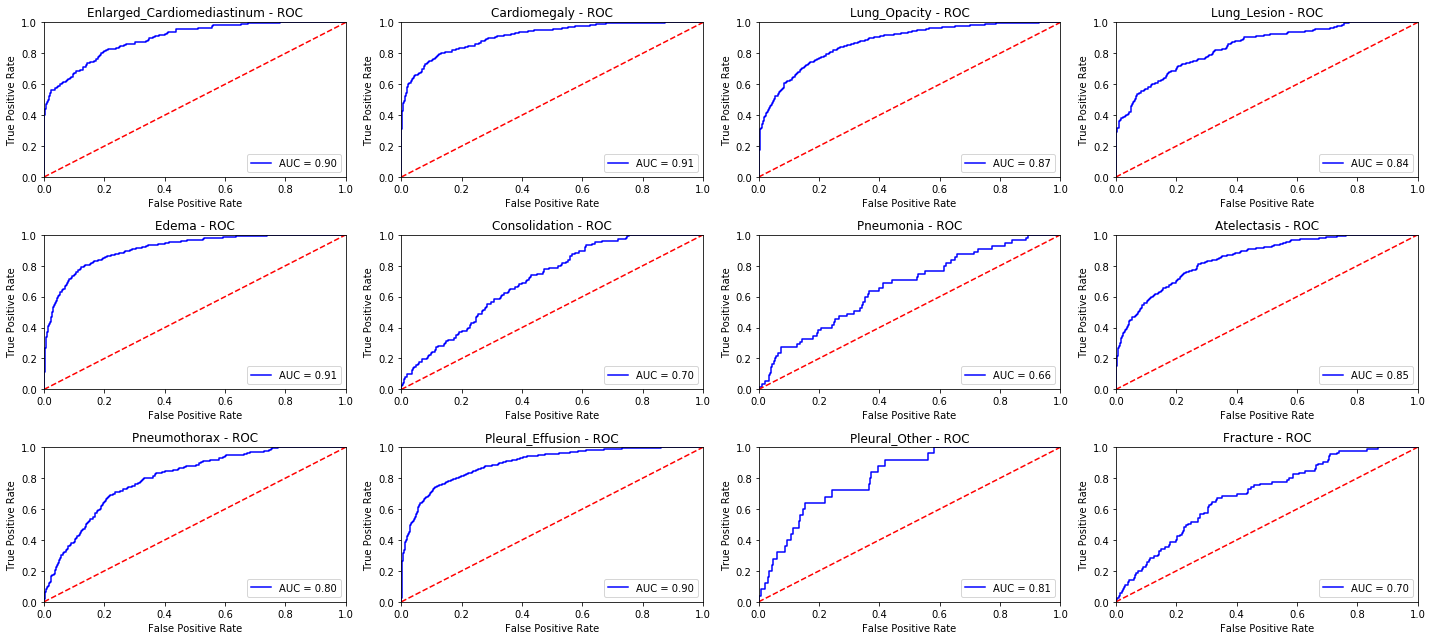

***** Precision / Recall *****


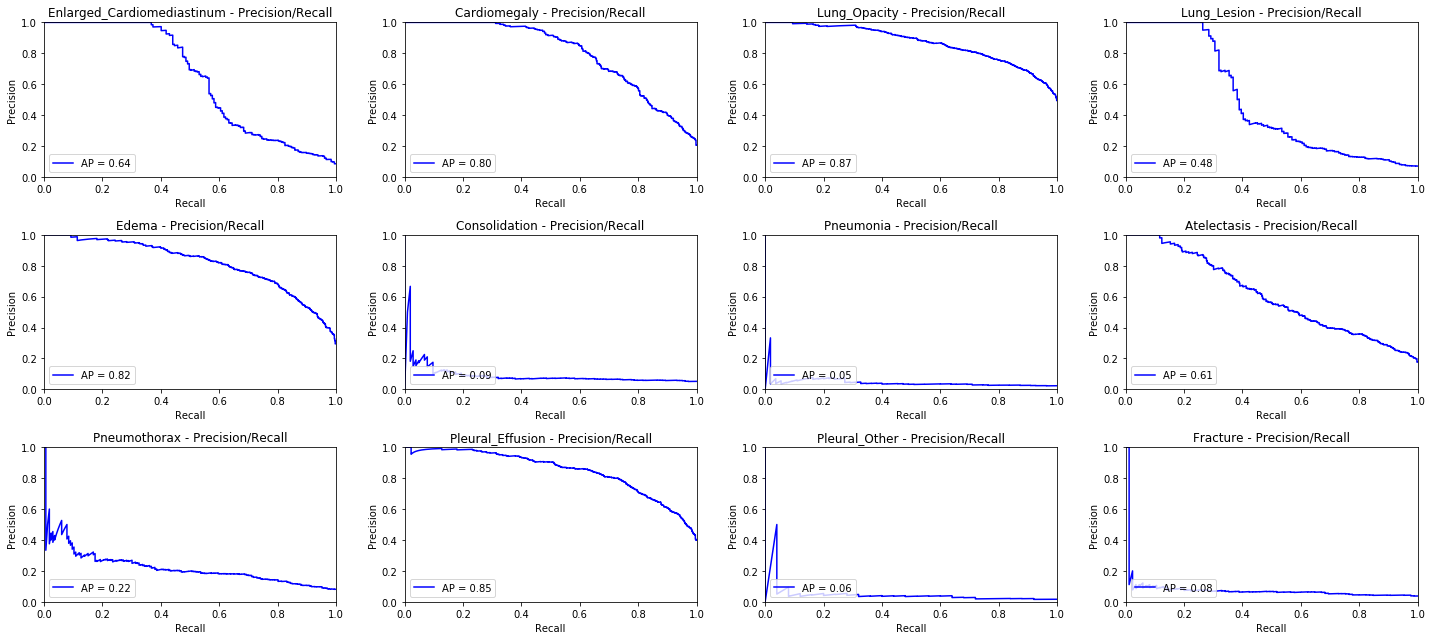


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.191446
Hamming Loss,0.133741
Combined Recall,0.050000
Combined Precision,0.081127
Combined F1,0.057943


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,29,0.000000,0.000000,0.000000,0.611733,0.080499
1,Cardiomegaly,58,0.051724,0.333333,0.089552,0.682567,0.246745
2,Lung_Opacity,213,0.065728,0.700000,0.120172,0.628230,0.548801
3,Lung_Lesion,14,0.000000,0.000000,0.000000,0.596436,0.047149
4,Edema,118,0.110169,0.520000,0.181818,0.723747,0.426012
5,Consolidation,23,0.000000,0.000000,0.000000,0.604422,0.074327
6,Pneumonia,13,0.000000,0.000000,0.000000,0.512874,0.035633
7,Atelectasis,74,0.081081,0.187500,0.113208,0.518083,0.180679
8,Pneumothorax,38,0.000000,0.000000,0.000000,0.633496,0.117264
9,Pleural_Effusion,180,0.094444,0.772727,0.168317,0.719989,0.591547


***** ROC *****


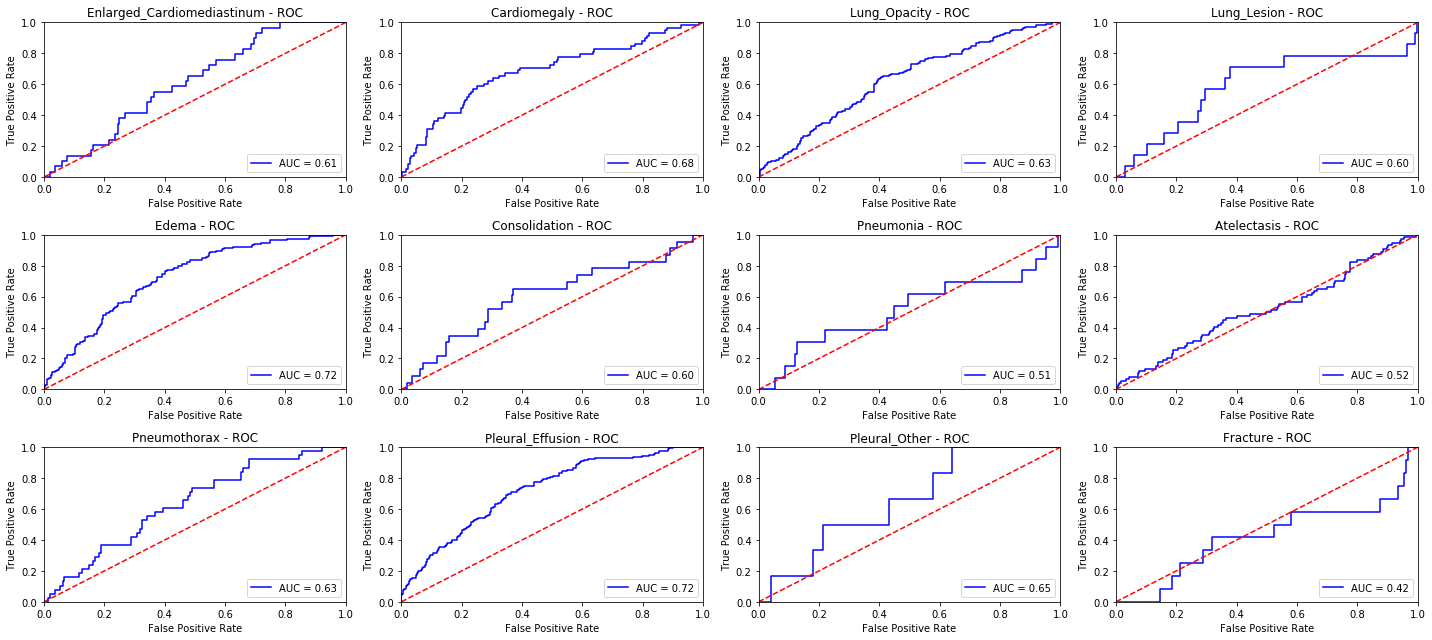

***** Precision / Recall *****


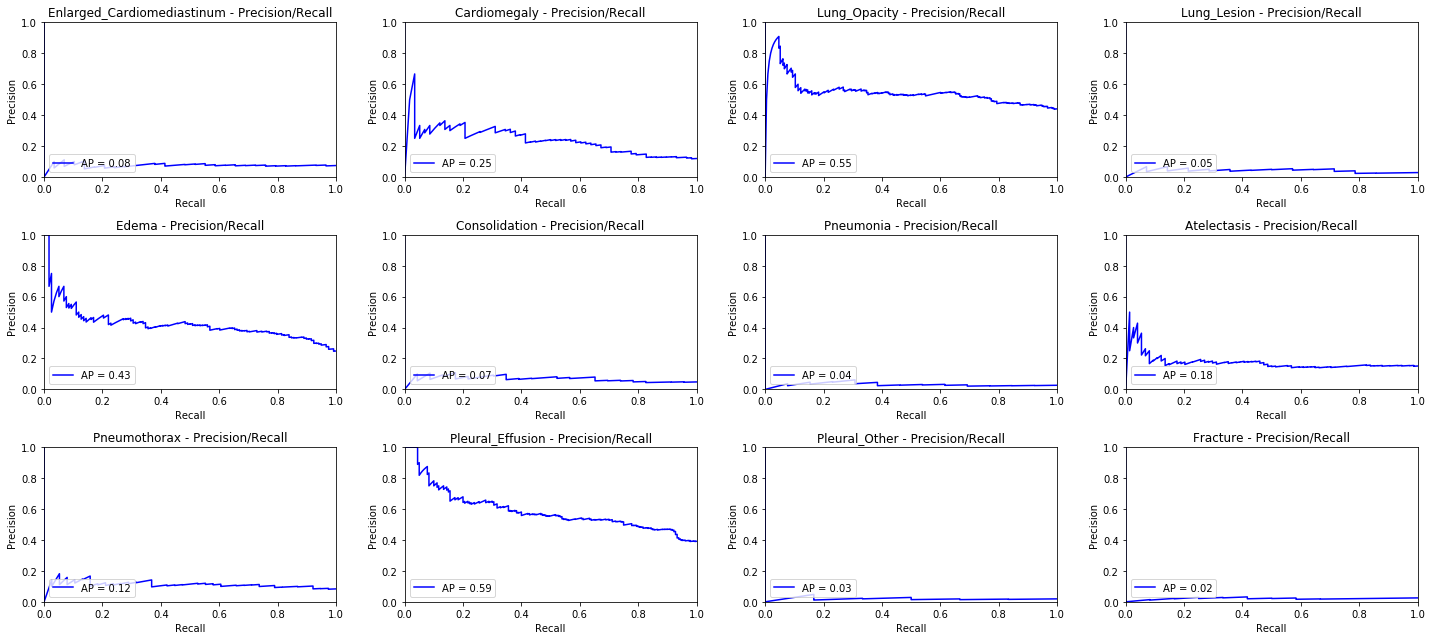

In [7]:
standardTraining.displayMetrics()